In [1]:
#loaded necessary imports
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import seaborn as sns
import os
from pathlib import Path
import requests
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
pn.extension('plotly')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Pulling Data From Yahoo Finance API

In [2]:
#extracting data from Yahoo Finance API
tickers = ['BTC-USD','ETH-USD', 'XRP-USD', 'ALGN', 'CROX'
          ]
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(2010,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

In [3]:
#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

In [4]:
#Checking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       5
dtype: int64

In [5]:
#Removing NaNs
all_data = all_data.dropna()

In [6]:
#Rechecking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       0
dtype: int64

In [38]:
#Seperating data by tickers
btc_data = all_data.loc[all_data['symbol'] == 'BTC-USD']
eth_data = all_data.loc[all_data['symbol'] == 'ETH-USD']
xrp_data = all_data.loc[all_data['symbol'] == 'XRP-USD']
algn_data = all_data.loc[all_data['symbol'] == 'ALGN']
crox_data = all_data.loc[all_data['symbol'] == 'CROX']

In [13]:
#Showing Data
#btc_data

In [14]:
#eth_data

In [15]:
#xrp_data

In [48]:
#algn_data

In [17]:
#crox_data

# Calculating RSI

In [20]:
#RSI FUNCTION
#30 and below is underbought, 70 and above is overbought
#https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [21]:
#Calculating RSI for BTC
btc_rsi = rsi(btc_data, periods=14, ema=True)

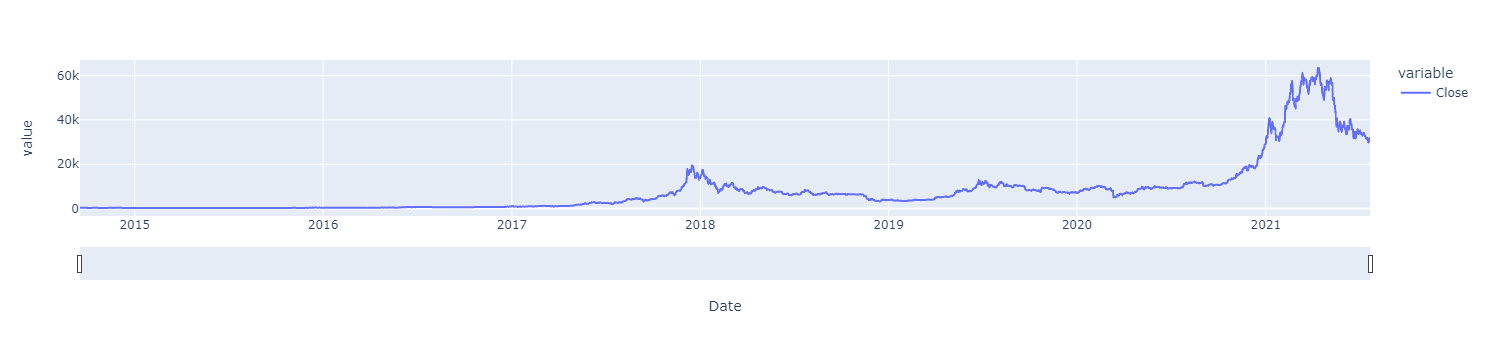

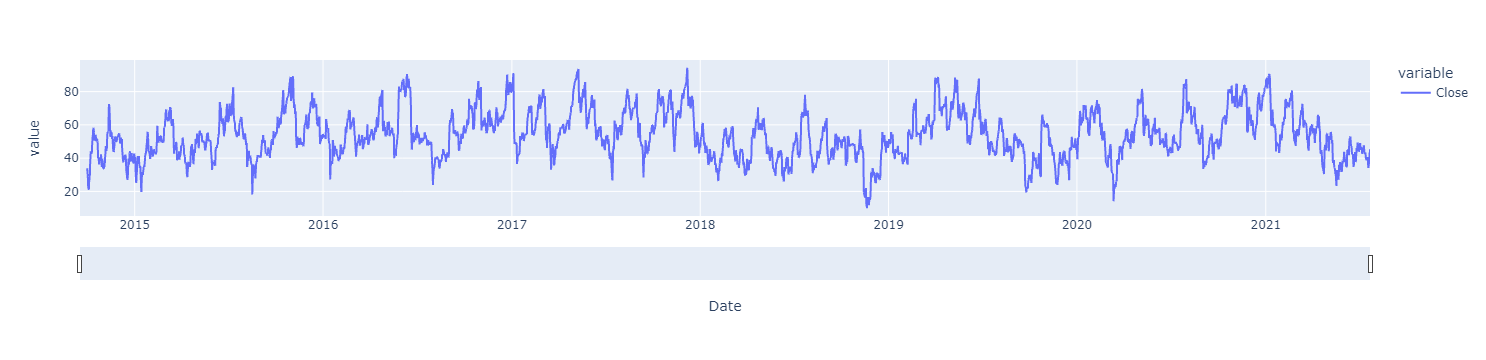

In [34]:
#Showing plot BTC
fig = px.line(btc_data['Close'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

fig2 = px.line(btc_rsi)
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [35]:
#fig2 = px.line(btc_rsi)
#fig2.update_xaxes(rangeslider_visible=True)
#fig2.show()

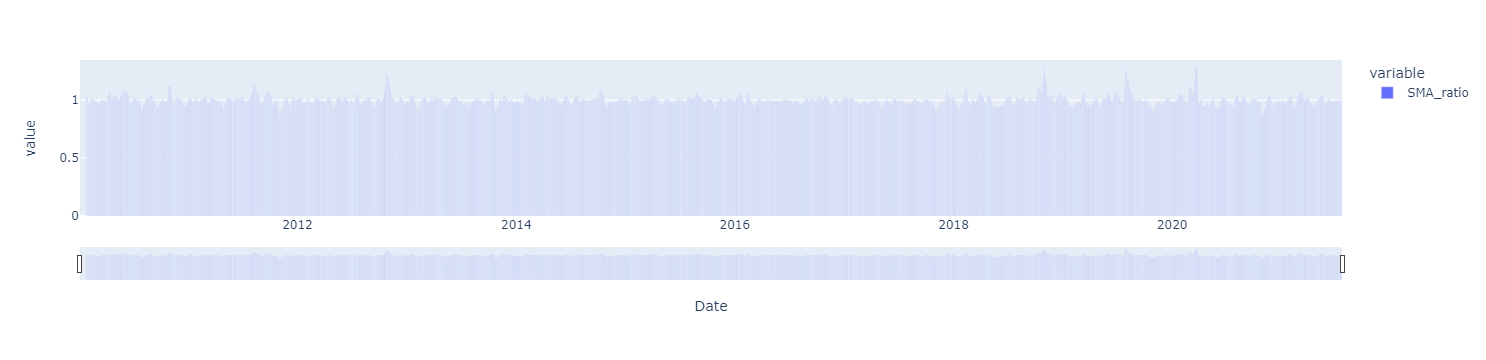

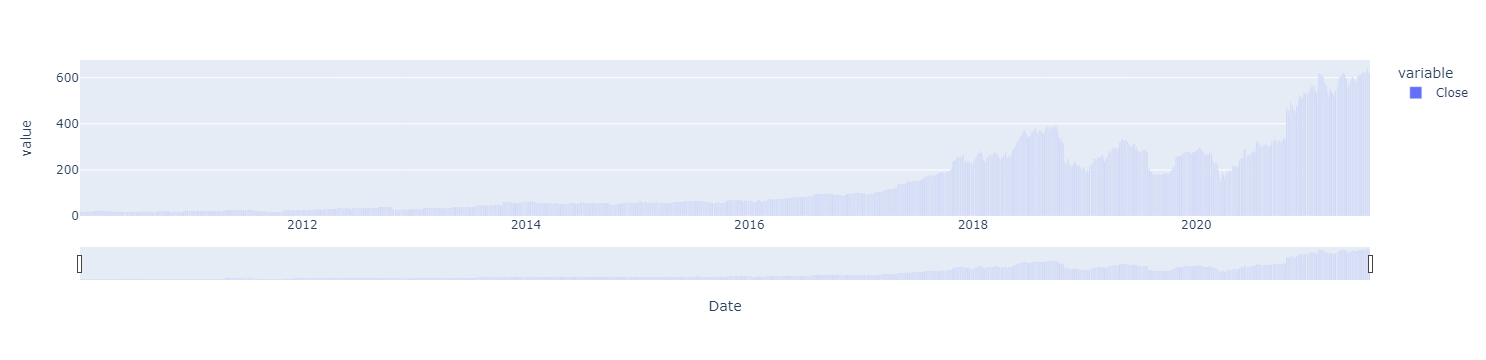

In [54]:
#Calculating Simple Moving Average for ALGN
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']

#Plotting
fig = px.bar(algn_data['SMA_ratio'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

fig2 = px.bar(algn_data['Close'])
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [15]:
#Calculating RSI for ETH
#eth_rsi = rsi(eth_data, periods=14, ema=True)

In [55]:
#Showing plot ETH
#fig = px.line(eth_data['Close'])
#fig.show()

In [56]:
#fig2 = px.line(eth_rsi)
#fig2.update_xaxes(rangeslider_visible=True)
#fig2.show()

In [18]:
#Calculating RSI for XRP
#xrp_rsi = rsi(xrp_data, periods=14, ema=True)

In [57]:
#Showing plot ETH
#fig = px.line(xrp_data['Close'])
#fig.show()

In [58]:
# = px.line(xrp_rsi)
#fig2.update_xaxes(rangeslider_visible=True)
#fig2.show()

# Calculating MACD

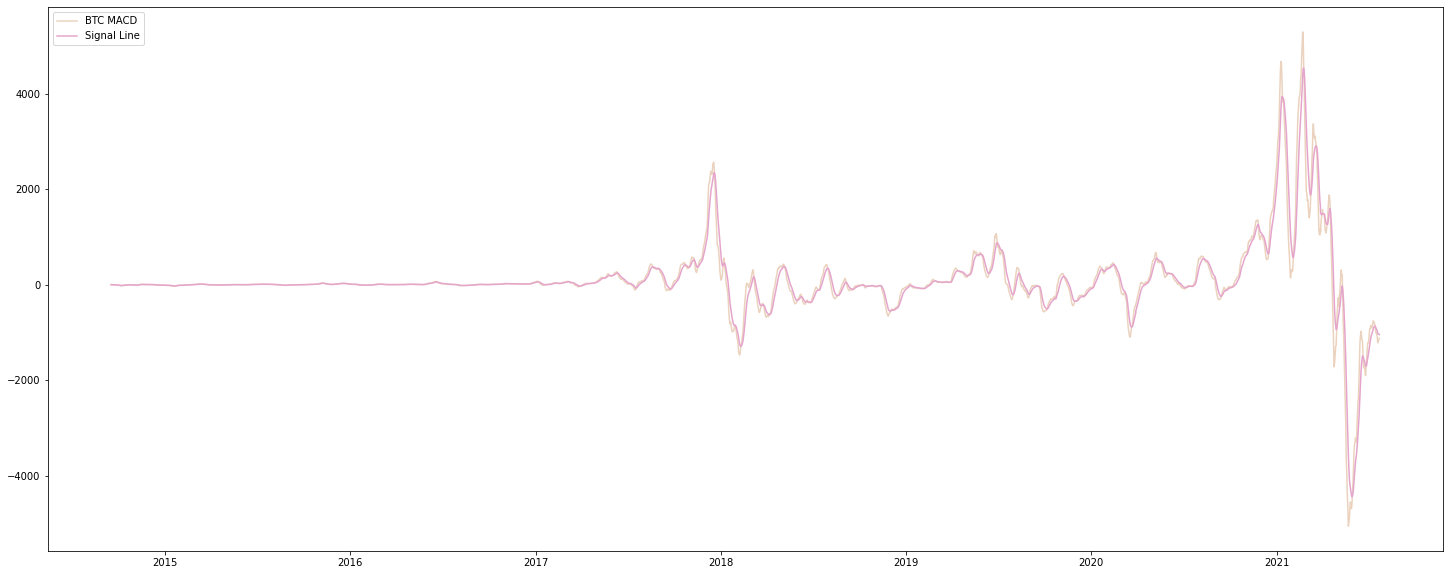

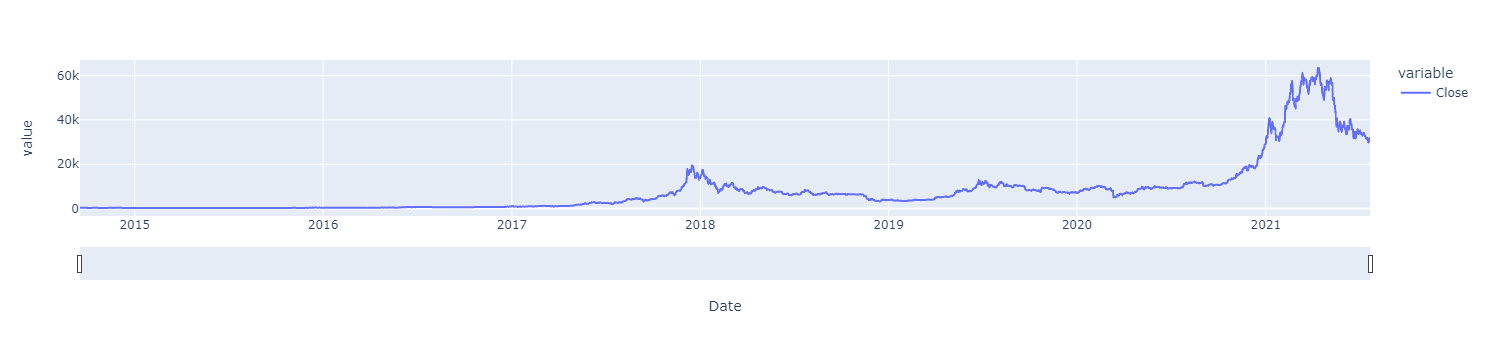

In [67]:
#Calculationg MACD for BTC
exp1 = btc_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = btc_data['Close'].ewm(span=26, adjust=False).mean()

macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()

plt.figure(figsize=(25,10))
plt.plot(btc_data.index, macd, label='BTC MACD', color = '#EBD2BE')
plt.plot(btc_data.index, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

fig = px.line(btc_data['Close'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()